In [29]:
import pandas as pd

add="D:/datasets/kaggle/Credit Card Fraud Detection/creditcard.csv"
df=pd.read_csv(add, header=0, sep=',')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


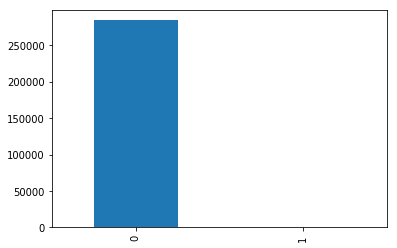

In [32]:
import matplotlib.pyplot as plt
df.Class.value_counts().plot(kind='bar')

In [33]:
ratio=df.Class.value_counts()[1]/df.shape[0]

In [34]:
from scipy.stats import skew, boxcox

In [35]:
#highly skewed data
skew(df.Amount)

16.97763503663315

In [41]:
#boxcox transformation to obtain best power
boxcox(df.Amount+10**(-50))[1]

0.11473731838330946

In [43]:
import numpy as np
df['Amount']=np.power(df.Amount.values,1/10)

In [47]:
df['zero_amount']=df.Amount.apply(lambda x:1 if x==0 else 0)
cols=df.columns
cols=list(cols[:-2])+['zero_amount','Class']
df=df[cols]

In [49]:
from sklearn.neighbors import LocalOutlierFactor

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1] , test_size=0.2, shuffle=True, stratify= df.iloc[:,[-2,-1]] , random_state=42)

In [53]:
# tune n_neighbors parameter

print("number of neighbors  accuracy score  recall score")
for nneighbor in [2,5,10,20,30]:
    lof=LocalOutlierFactor(novelty=True,n_neighbors=nneighbor, contamination=ratio)
    lof.fit(X_train)
    test_labels=lof.predict(X_test)
    test_labels[test_labels==1]=0
    test_labels[test_labels==-1]=1
    print(nneighbor, accuracy_score(y_test, test_labels), recall_score(y_test, test_labels))

number of neighbors  accuracy score  recall score
2 0.9964011095116042 0.01020408163265306
5 0.9972262209894316 0.10204081632653061
10 0.9969628875390611 0.14285714285714285
20 0.9970682209192093 0.15306122448979592
30 0.9970857764825674 0.14285714285714285


In [54]:
lof=LocalOutlierFactor(novelty=True,n_neighbors=20, contamination=ratio)
lof.fit(X_train)
test_labels=lof.predict(X_test)
test_labels

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
pd.Series(test_labels).value_counts()

 1    56863
-1       99
dtype: int64

In [57]:
#make values of test_labels consistent with class column of the original dataset
test_labels[test_labels==1]=0
test_labels[test_labels==-1]=1

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score

In [59]:
pd.DataFrame(confusion_matrix(y_test, test_labels),columns=['negative predictions','positive predictions'],
              index=['true negatives','true positives'])
#positive means fraud

,negative predictions,positive predictions
true negatives,56780,84
true positives,83,15


In [60]:
print(recall_score(y_test, test_labels))
print(accuracy_score(y_test, test_labels))

0.15306122448979592
0.9970682209192093


In [61]:
print(classification_report(y_test, test_labels,digits=5))

              precision    recall  f1-score   support

           0    0.99854   0.99852   0.99853     56864
           1    0.15152   0.15306   0.15228        98

   micro avg    0.99707   0.99707   0.99707     56962
   macro avg    0.57503   0.57579   0.57541     56962
weighted avg    0.99708   0.99707   0.99708     56962

